## Importing required modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

## Reading and understanding data

In [ ]:
bank = pd.read_csv('bank marketing v2.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,poutcome,deposit,p_recency
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,unknown,yes,NaN
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,unknown,yes,NaN
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,unknown,yes,NaN
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,unknown,yes,NaN
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,unknown,yes,NaN


In [ ]:
bank.shape

(11162, 15)

In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'poutcome', 'deposit',
       'p_recency'],
      dtype='object')

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  poutcome   11162 non-null  object
 13  deposit    11162 non-null  object
 14  p_recency  2838 non-null   object
dtypes: int64(4), object(11)
memory usage: 1.3+ MB


In [ ]:
bank.describe()

,age,balance,day,duration
count,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818
std,11.913369,3225.413326,8.420740,347.128386
min,18.000000,-6847.000000,1.000000,2.000000
25%,32.000000,122.000000,8.000000,138.000000
50%,39.000000,550.000000,15.000000,255.000000
75%,49.000000,1708.000000,22.000000,496.000000
max,95.000000,81204.000000,31.000000,3881.000000


In [ ]:
bank['deposit'].value_counts(normalize=True)*100

,proportion
deposit,
no,52.616019
yes,47.383981


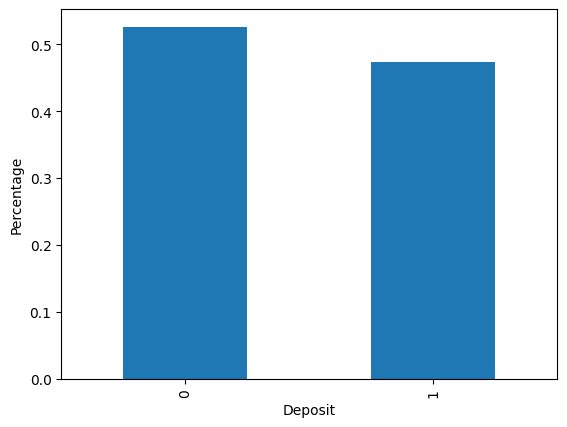

In [ ]:
bank['deposit'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Deposit')
plt.ylabel('Percentage')
plt.show()

## Data Cleaning

In [ ]:
bank.isnull().sum()/len(bank)*100

,0
age,0.000000
job,0.000000
marital,0.000000
education,0.000000
default,0.000000
balance,0.000000
housing,0.000000
loan,0.000000
contact,0.000000
day,0.000000


In [ ]:
#null values are highest. So dropping that column
bank = bank.drop('p_recency',axis=1)
bank.shape

(11162, 14)

In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] #df.select_dtypes(include='object')
num_columns = ['age', 'balance', 'day',' duration']  #df.select_dtypes(exclude='object')

In [ ]:
for i in cat_columns:
  print(bank[i].value_counts())
  print('\n')

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64


marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64


education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64


default
no     10994
yes      168
Name: count, dtype: int64


housing
no     5881
yes    5281
Name: count, dtype: int64


loan
no     9702
yes    1460
Name: count, dtype: int64


contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64


month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64


poutcome
unknown    8326
failure    1228
success    1071
oth

### Imputation of columns

In [ ]:
#replace unknown values with Null values
bank['poutcome'] = bank['poutcome'].replace('unknown',np.NaN)
bank['contact'] = bank['contact'].replace('unknown',np.NaN)
bank['education'] = bank['education'].replace('unknown',np.NaN)
bank['job'] = bank['job'].replace('unknown',np.NaN)

In [ ]:
bank.isnull().sum()/len(bank)*100

,0
age,0.000000
job,0.627128
marital,0.000000
education,4.452607
default,0.000000
balance,0.000000
housing,0.000000
loan,0.000000
contact,21.017739
day,0.000000


In [ ]:
#null values are highest. So dropping that column
bank = bank.drop('poutcome',axis=1)
bank.shape

(11162, 13)

In [ ]:
#replace the null values with mode of the categorical column
bank['contact'] = bank['contact'].fillna(bank['contact'].mode()[0])
bank['education'] = bank['education'].fillna(bank['education'].mode()[0])
bank['job'] = bank['job'].fillna(bank['job'].mode()[0])

In [ ]:
bank.isnull().sum()/len(bank)*100

,0
age,0.0
job,0.0
marital,0.0
education,0.0
default,0.0
balance,0.0
housing,0.0
loan,0.0
contact,0.0
day,0.0


In [ ]:
#these columns are not meant for analysis
bank = bank.drop(['day','duration'],axis=1)
bank.shape

(11162, 11)

## Data Visualization

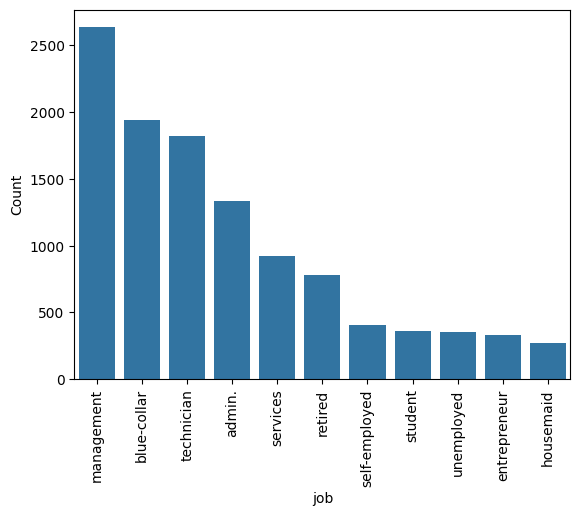

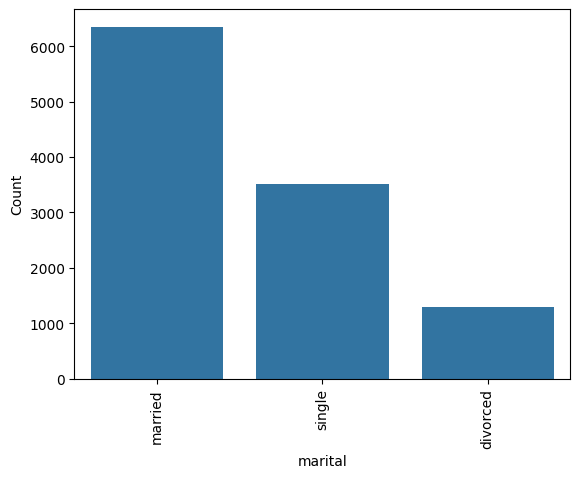

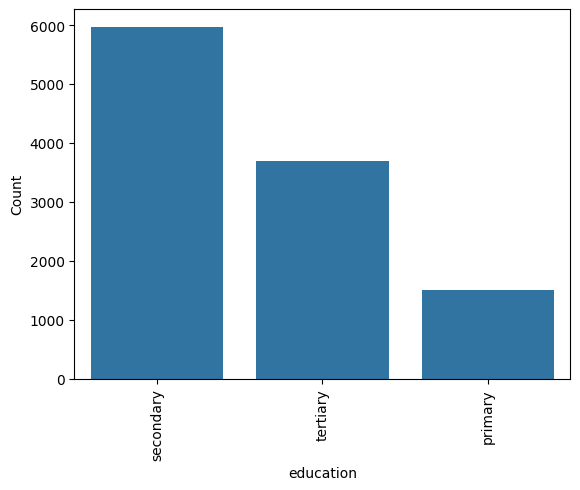

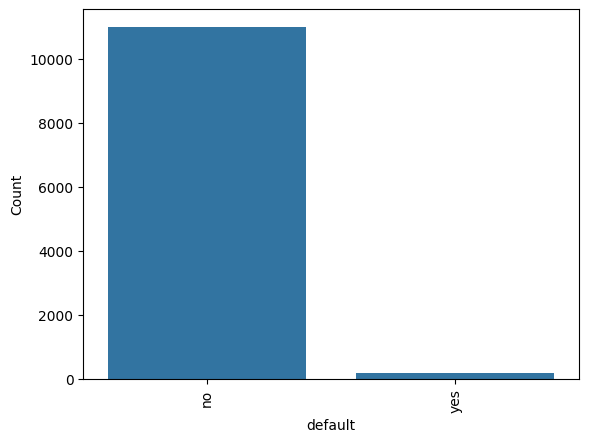

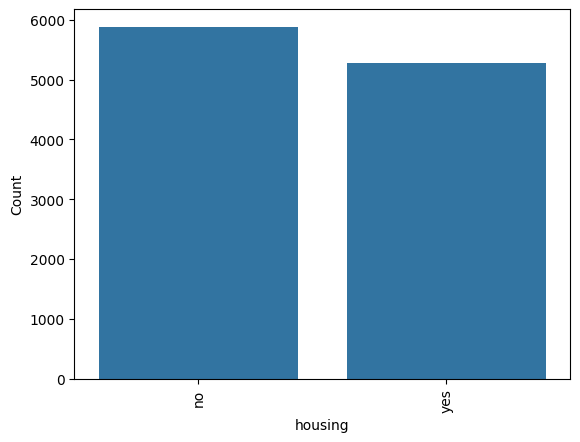

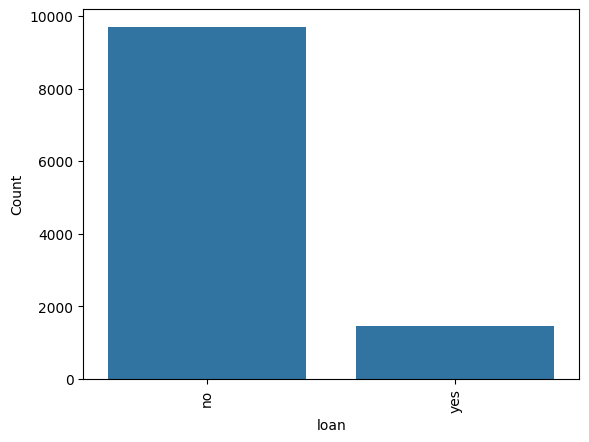

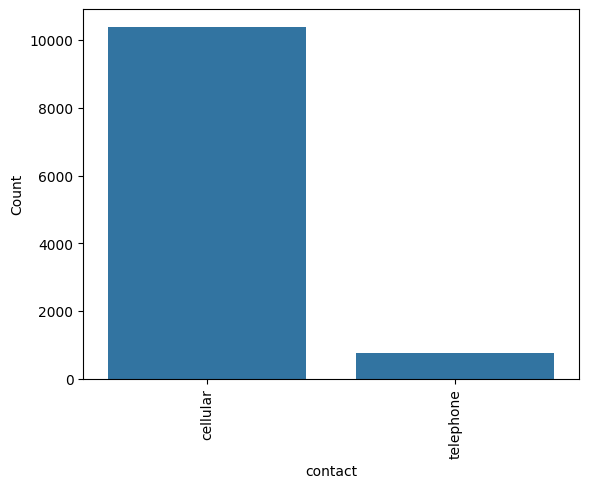

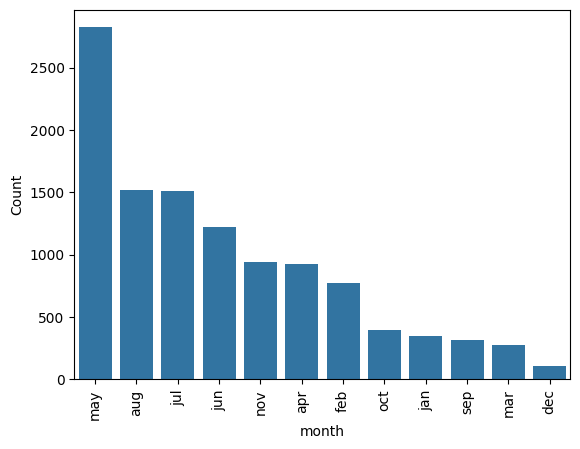

In [ ]:
for i in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']:
  sns.barplot(bank[i].value_counts())
  plt.xlabel(i)
  plt.ylabel('Count')
  plt.xticks(rotation=90)
  plt.show()

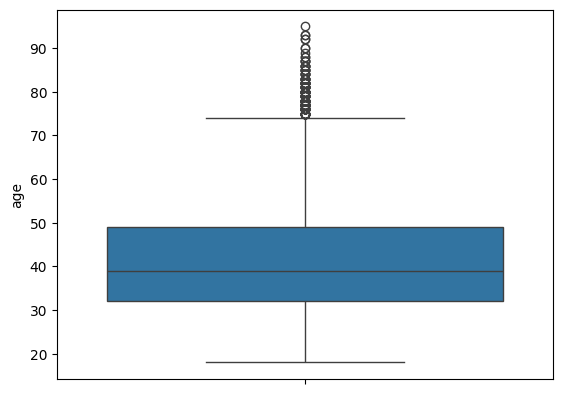

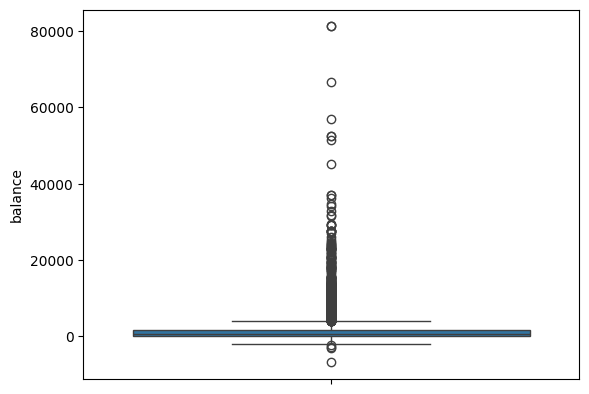

In [ ]:
for i in num_columns:
  sns.boxplot(bank[i])
  plt.show()

## Data Preparation

In [ ]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,deposit
0,59,admin.,married,secondary,no,2343,yes,no,cellular,may,yes
1,56,admin.,married,secondary,no,45,no,no,cellular,may,yes
2,41,technician,married,secondary,no,1270,yes,no,cellular,may,yes
3,55,services,married,secondary,no,2476,yes,no,cellular,may,yes
4,54,admin.,married,tertiary,no,184,no,no,cellular,may,yes


In [ ]:
binary_col = ['default','loan','housing']
non_binary_col = ['job','marital','education','contact','month']

In [ ]:
bank[binary_col] = bank[binary_col].apply(lambda x: x.map({'yes':1,'no': 0}))
bank[binary_col].head()

,default,loan,housing
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,0


### Creating dummy variables

In [ ]:
dummy1 = pd.get_dummies(bank[non_binary_col],drop_first=True,dtype='int64')
dummy1.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
bank = pd.concat([bank,dummy1],axis=1)
bank.shape

(11162, 37)

In [ ]:
bank = bank.drop(non_binary_col,axis=1)
bank.shape

(11162, 32)

In [ ]:
bank.head()

,age,default,balance,housing,loan,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,59,0,2343,1,0,yes,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,56,0,45,0,0,yes,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,41,0,1270,1,0,yes,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,55,0,2476,1,0,yes,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,54,0,184,0,0,yes,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#target feature
bank['deposit'] = bank['deposit'].map({'yes':1,'no':0})
bank.head()

,age,default,balance,housing,loan,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,59,0,2343,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,56,0,45,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,41,0,1270,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,55,0,2476,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,54,0,184,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   default              11162 non-null  int64
 2   balance              11162 non-null  int64
 3   housing              11162 non-null  int64
 4   loan                 11162 non-null  int64
 5   deposit              11162 non-null  int64
 6   job_blue-collar      11162 non-null  int64
 7   job_entrepreneur     11162 non-null  int64
 8   job_housemaid        11162 non-null  int64
 9   job_management       11162 non-null  int64
 10  job_retired          11162 non-null  int64
 11  job_self-employed    11162 non-null  int64
 12  job_services         11162 non-null  int64
 13  job_student          11162 non-null  int64
 14  job_technician       11162 non-null  int64
 15  job_unemployed       11162 non-null  int64
 16  marital_married      1

### Spliting data

In [ ]:
df_train, df_test = train_test_split(bank, train_size=0.7, test_size=0.3, random_state=100)

(7813, 32)
(3349, 32)


In [ ]:
print(df_train.shape)
print(df_test.shape)

### Re-scaling data

In [ ]:
num_columns.columns

Index(['age', 'balance'], dtype='object')

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df_train[['age', 'balance']] = scaler.fit_transform(df_train[['age', 'balance']])
df_train.head()

,age,default,balance,housing,loan,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
3496,0.454545,0,0.077762,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1897,0.155844,0,0.115694,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
10823,0.181818,0,0.072606,1,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4507,0.142857,0,0.079170,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8947,0.376623,0,0.090788,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_test[['age', 'balance']] = scaler.transform(df_test[['age', 'balance']])
df_test.head()

,age,default,balance,housing,loan,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
1402,0.493506,0,0.117489,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9326,0.142857,0,0.094173,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3380,0.779221,0,0.093537,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7413,0.220779,0,0.083474,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10309,0.363636,0,0.077762,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building & Predictions

In [ ]:
X_train = df_train.drop('deposit',axis=1)
y_train = df_train['deposit']

X_test = df_test.drop('deposit',axis=1)
y_test = df_test['deposit']

In [ ]:
X_train.shape, X_test.shape

((7813, 31), (3349, 31))

In [ ]:
y_train.shape, y_test.shape

((7813,), (3349,))

### Using Logistic regression

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [ ]:
y_train_pred_lr = lr.predict(X_train)
print('Train set Accuracy :',accuracy_score(y_train,y_train_pred_lr))

y_test_pred_lr = lr.predict(X_test)
print('Test set Accuracy :',accuracy_score(y_test,y_test_pred_lr))

Train set Accuracy : 0.6608217074107258
Test set Accuracy : 0.6601970737533592


### Using Decision Trees

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_train_pred_dt = dt.predict(X_train)
print('Train set Accuracy :',accuracy_score(y_train,y_train_pred_dt))

y_test_pred_dt = dt.predict(X_test)
print('Test set Accuracy :',accuracy_score(y_test,y_test_pred_dt))

Train set Accuracy : 0.9988480737232817
Test set Accuracy : 0.6061510898775754


**overfitting model**

### Using RandomForest

In [ ]:
rfc = RandomForestClassifier(random_state=42,n_estimators=100,oob_score=True)
rfc.fit(X_train,y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [ ]:
y_train_pred_rfc = rfc.predict(X_train)
print('Train set Accuracy :',accuracy_score(y_train,y_train_pred_rfc))

y_test_pred_rfc = rfc.predict(X_test)
print('Test set Accuracy :',accuracy_score(y_test,y_test_pred_rfc))

Train set Accuracy : 0.9988480737232817
Test set Accuracy : 0.6431770677814272


In [ ]:
recall_score(y_test,y_test_pred_rfc)

0.575299306868305

In [ ]:
rfc.oob_score_

0.6486624856009215

**overfitting model**

### Applying the cross-fold validation

In [ ]:
scores_lr = cross_val_score(lr,X_train,y_train,cv=5,n_jobs=-1)
print('Cross Validation Scores :',scores_lr)
print('Mean Cross Validation Score :',np.mean(scores_lr))

Cross Validation Scores : [0.65962892 0.65962892 0.64299424 0.66325224 0.65428937]
Mean Cross Validation Score : 0.6559587385301748


In [ ]:
scores_rfc = cross_val_score(rfc,X_train,y_train,cv=5,n_jobs=-1)  #default is accuracy score
print('Cross Validation Scores :',scores_rfc)
print('Mean Cross Validation Score :',np.mean(scores_rfc))

Cross Validation Scores : [0.64619322 0.6615483  0.65387076 0.66133163 0.64724712]
Mean Cross Validation Score : 0.6540382058535122


In [ ]:
from sklearn.metrics import get_scorer_names # import the get_scorer_names function
get_scorer_names() # call the function to get the available metrics

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
scores_rfc = cross_val_score(rfc,X_train,y_train,cv=5,n_jobs=-1,scoring='recall')
print('Cross Validation Recall Scores :',scores_rfc)
print('Mean Cross Validation Recall Score :',np.mean(scores_rfc))

Cross Validation Recall Scores : [0.57297297 0.60188934 0.58569501 0.60540541 0.57972973]
Mean Cross Validation Recall Score : 0.5891384907174381


## Feature Selection

In [ ]:
X_train.shape

(7813, 31)

### Using RFE

In [ ]:
lr = LogisticRegression(random_state=42)

In [ ]:
rfe = RFE(lr,n_features_to_select=20)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=20)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', False, 12),
 ('default', True, 1),
 ('balance', True, 1),
 ('housing', True, 1),
 ('loan', True, 1),
 ('job_blue-collar', False, 10),
 ('job_entrepreneur', True, 1),
 ('job_housemaid', False, 4),
 ('job_management', False, 5),
 ('job_retired', True, 1),
 ('job_self-employed', False, 7),
 ('job_services', False, 9),
 ('job_student', True, 1),
 ('job_technician', False, 11),
 ('job_unemployed', False, 3),
 ('marital_married', False, 6),
 ('marital_single', True, 1),
 ('education_secondary', False, 2),
 ('education_tertiary', True, 1),
 ('contact_telephone', False, 8),
 ('month_aug', True, 1),
 ('month_dec', True, 1),
 ('month_feb', True, 1),
 ('month_jan', True, 1),
 ('month_jul', True, 1),
 ('month_jun', True, 1),
 ('month_mar', True, 1),
 ('month_may', True, 1),
 ('month_nov', True, 1),
 ('month_oct', True, 1),
 ('month_sep', True, 1)]

In [ ]:
sup_col = X_train.columns[rfe.support_]
sup_col

Index(['default', 'balance', 'housing', 'loan', 'job_entrepreneur',
       'job_retired', 'job_student', 'marital_single', 'education_tertiary',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep'],
      dtype='object')

In [ ]:
nonsup_col = X_train.columns[~rfe.support_]
nonsup_col

Index(['age', 'job_blue-collar', 'job_housemaid', 'job_management',
       'job_self-employed', 'job_services', 'job_technician', 'job_unemployed',
       'marital_married', 'education_secondary', 'contact_telephone'],
      dtype='object')

In [ ]:
X_train[sup_col].head()

,default,balance,housing,loan,job_entrepreneur,job_retired,job_student,marital_single,education_tertiary,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
3496,0,0.077762,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1897,0,0.115694,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
10823,0,0.072606,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4507,0,0.079170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8947,0,0.090788,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
cross_val_score(lr, X_train[sup_col], y_train, n_jobs=-1)

array([0.66922585, 0.65642994, 0.65259117, 0.66773367, 0.64852753])

In [ ]:
num_features = X_train[sup_col].shape
num_features[1]

20

In [ ]:
cv_scores = []
logreg = LogisticRegression(random_state=42)

In [ ]:
%%time
for features in range(1, num_features[1]+1):
    rfe = RFE(lr, n_features_to_select=features)
    scores = cross_val_score(rfe, X_train[sup_col], y_train, cv=4)
    cv_scores.append(scores.mean())

CPU times: user 37.3 s, sys: 26.9 s, total: 1min 4s
Wall time: 41.5 s


In [ ]:
print(cv_scores)

[0.5366695648664811, 0.5447336224195932, 0.5574045991758212, 0.5764755269823452, 0.5979777588058368, 0.6103928501987075, 0.6181974192919483, 0.6179421235262025, 0.6143597284392015, 0.6267739681910778, 0.6240854685938385, 0.6347094934649001, 0.6389343534158141, 0.6400862306159958, 0.6394459931208372, 0.6455901243186217, 0.6481489124413482, 0.6532698297399324, 0.6572375596214206, 0.6583881921155339]


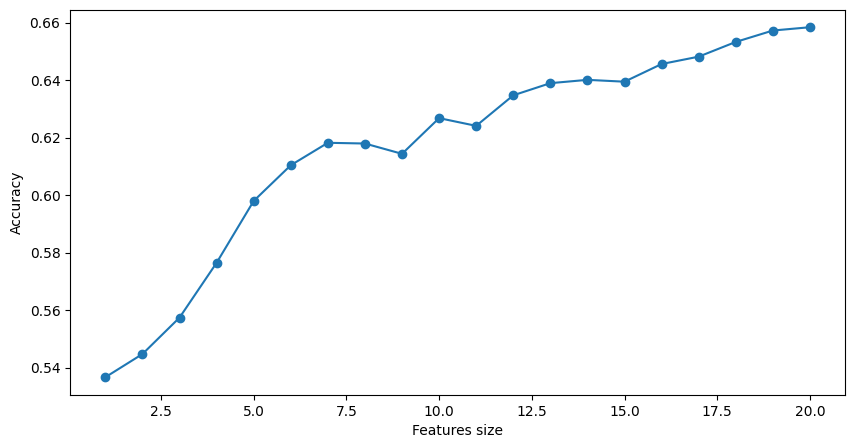

In [ ]:
plt.figure(figsize=[10, 5])
plt.xlabel('Features size')
plt.ylabel('Accuracy')
plt.plot(range(1, num_features[1]+1), cv_scores, marker = 'o')
plt.show()

### Using RFECV

In [ ]:
rfecv = RFECV(estimator=lr, cv=4)

In [ ]:
%%time
rfecv.fit(X_train[sup_col], y_train)

CPU times: user 3.08 s, sys: 2.1 s, total: 5.18 s
Wall time: 2.73 s


RFECV(cv=4, estimator=LogisticRegression(random_state=42))

In [ ]:
rfecv.cv_results_

{'mean_test_score': array([0.53666956, 0.54473362, 0.5574046 , 0.57647553, 0.59797776,
        0.61039285, 0.61819742, 0.61794212, 0.61435973, 0.62677397,
        0.62408547, 0.63470949, 0.63893435, 0.64008623, 0.63944599,
        0.64559012, 0.64814891, 0.65326983, 0.65723756, 0.65838819]),
 'std_test_score': array([0.00175676, 0.00519526, 0.0036669 , 0.00277071, 0.0025379 ,
        0.00336631, 0.01370495, 0.01094751, 0.00514355, 0.0105399 ,
        0.01579595, 0.01020563, 0.00527689, 0.00767443, 0.01000853,
        0.00675717, 0.00888083, 0.00208696, 0.00551966, 0.00876243]),
 'split0_test_score': array([0.53735926, 0.54094166, 0.55527124, 0.57318321, 0.59774821,
        0.61105425, 0.64176049, 0.63613101, 0.62180143, 0.64176049,
        0.64431934, 0.64943705, 0.64483112, 0.64636643, 0.64790174,
        0.64994882, 0.66069601, 0.65609007, 0.66018424, 0.67144319]),
 'split1_test_score': array([0.53917051, 0.53917051, 0.55862775, 0.58064516, 0.60061444,
        0.61290323, 0.61290323,

In [ ]:
rfecv.cv_results_['mean_test_score']

array([0.53666956, 0.54473362, 0.5574046 , 0.57647553, 0.59797776,
       0.61039285, 0.61819742, 0.61794212, 0.61435973, 0.62677397,
       0.62408547, 0.63470949, 0.63893435, 0.64008623, 0.63944599,
       0.64559012, 0.64814891, 0.65326983, 0.65723756, 0.65838819])

In [ ]:
rfecv.n_features_

20

## Using GridSearchCV

In [145]:
rfc = RandomForestClassifier(max_depth=12,random_state=42, n_jobs=-1)

In [146]:
hyper_parameters = {'min_samples_leaf': [5, 10, 20, 50],
                    'n_estimators': [50, 60, 70],
                    'max_features': [10, 12, 14, 16]
}

In [147]:
model_cv = GridSearchCV(estimator=rfc,
             param_grid=hyper_parameters,
             verbose=1,
             cv=5,
             n_jobs=-1,
             return_train_score=True)

In [148]:
%%time
model_cv.fit(X_train[sup_col], y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
CPU times: user 2.83 s, sys: 466 ms, total: 3.29 s
Wall time: 2min 22s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=12, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [10, 12, 14, 16],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [50, 60, 70]},
             return_train_score=True, verbose=1)

In [149]:
model_cv.best_score_

0.6628695923578463

In [150]:
model_cv.best_estimator_

RandomForestClassifier(max_depth=12, max_features=10, min_samples_leaf=20,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [151]:
model_cv.best_params_

{'max_features': 10, 'min_samples_leaf': 20, 'n_estimators': 50}

In [152]:
cv_df = pd.DataFrame(model_cv.cv_results_)

In [153]:
rf_best = model_cv.best_estimator_
rf_best

RandomForestClassifier(max_depth=12, max_features=10, min_samples_leaf=20,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [154]:
y_test_pred = rf_best.predict(X_test[sup_col])

In [155]:
accuracy_score(y_test, y_test_pred)

0.6637802329053448

In [156]:
cv_df.shape

(48, 23)

In [157]:
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.293425,0.214434,0.087628,0.014369,10,5,50,"{'max_features': 10, 'min_samples_leaf': 5, 'n...",0.667306,0.677543,...,0.662614,0.011153,2,0.71376,0.71520,0.71552,0.715406,0.726764,0.717330,0.004759
1,1.616682,0.322754,0.102510,0.009688,10,5,60,"{'max_features': 10, 'min_samples_leaf': 5, 'n...",0.662828,0.675624,...,0.661590,0.011714,4,0.71616,0.71248,0.71584,0.714126,0.728203,0.717362,0.005579
2,1.295758,0.178891,0.094770,0.019868,10,5,70,"{'max_features': 10, 'min_samples_leaf': 5, 'n...",0.664107,0.676264,...,0.661078,0.012247,5,0.71520,0.71552,0.71424,0.717165,0.726924,0.717810,0.004654
3,0.733843,0.272254,0.043175,0.006163,10,10,50,"{'max_features': 10, 'min_samples_leaf': 10, '...",0.668586,0.674984,...,0.660821,0.010605,6,0.69952,0.70048,0.70384,0.703567,0.712366,0.703955,0.004531
4,0.716157,0.021339,0.048580,0.006689,10,10,60,"{'max_features': 10, 'min_samples_leaf': 10, '...",0.665387,0.676264,...,0.659669,0.011092,11,0.70064,0.70128,0.70176,0.702448,0.712846,0.703795,0.004564


In [158]:
cv_df.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
6,0.877820,0.224248,0.056114,0.018117,10,20,50,"{'max_features': 10, 'min_samples_leaf': 20, '...",0.671145,0.671785,...,0.662870,0.009518,1,0.69152,0.68688,0.69456,0.691089,0.700048,0.692819,0.004364
0,1.293425,0.214434,0.087628,0.014369,10,5,50,"{'max_features': 10, 'min_samples_leaf': 5, 'n...",0.667306,0.677543,...,0.662614,0.011153,2,0.71376,0.71520,0.71552,0.715406,0.726764,0.717330,0.004759
7,0.643179,0.015309,0.040197,0.002325,10,20,60,"{'max_features': 10, 'min_samples_leaf': 20, '...",0.671145,0.669226,...,0.661974,0.010075,3,0.69168,0.68736,0.69312,0.690610,0.699408,0.692436,0.003969
1,1.616682,0.322754,0.102510,0.009688,10,5,60,"{'max_features': 10, 'min_samples_leaf': 5, 'n...",0.662828,0.675624,...,0.661590,0.011714,4,0.71616,0.71248,0.71584,0.714126,0.728203,0.717362,0.005579
2,1.295758,0.178891,0.094770,0.019868,10,5,70,"{'max_features': 10, 'min_samples_leaf': 5, 'n...",0.664107,0.676264,...,0.661078,0.012247,5,0.71520,0.71552,0.71424,0.717165,0.726924,0.717810,0.004654


In [159]:
sel_cols = ['param_max_features','param_min_samples_leaf','param_n_estimators', 'rank_test_score',  'mean_test_score']

In [160]:
cv_df[sel_cols].sort_values(by='rank_test_score')

,param_max_features,param_min_samples_leaf,param_n_estimators,rank_test_score,mean_test_score
6,10,20,50,1,0.662870
0,10,5,50,2,0.662614
7,10,20,60,3,0.661974
1,10,5,60,4,0.661590
2,10,5,70,5,0.661078
3,10,10,50,6,0.660821
8,10,20,70,7,0.660438
5,10,10,70,8,0.659797
20,12,20,70,9,0.659670
19,12,20,60,10,0.659670


## Using RandomizedSearchCV

In [136]:
hyper_params = {'max_depth': range(3, 20),
                'max_features': range(3, 17),
                'min_samples_leaf': range(20, 400, 50),
                'n_estimators': range(10, 101, 10)}

In [137]:
rfc = RandomForestClassifier(max_depth=12, random_state=42, n_jobs=-1)

In [138]:
model_rcv = RandomizedSearchCV(estimator=rfc,
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=50)

In [139]:
model_rcv.fit(X_train[sup_col], y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=12, n_jobs=-1,
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_features': range(3, 17),
                                        'min_samples_leaf': range(20, 400, 50),
                                        'n_estimators': range(10, 101, 10)},
                   return_train_score=True, verbose=1)

In [140]:
model_rcv.best_score_

0.6676053880427917

In [141]:
rf_best = model_rcv.best_estimator_
rf_best

RandomForestClassifier(max_depth=13, max_features=6, min_samples_leaf=20,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [143]:
y_test_pred = rf_best.predict(X_test[sup_col])

In [144]:
accuracy_score(y_test, y_test_pred)

0.6676619886533294